<a href="https://colab.research.google.com/github/siy0h/transit-coverage-app/blob/main/publictransitcoverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import os
root = 'sample_data/GTFS'
data_sources = os.listdir(root)
print(data_sources)

['stops.txt', 'trips.txt', 'agency.txt', 'calendar_dates.txt', 'routes.txt', 'calendar.txt', 'shapes.txt', 'feed_info.txt', 'stop_times.txt']


In [21]:
source_df = {}
for ds in data_sources:
  source_df[ds.removesuffix('.txt')] = pd.read_csv(os.path.join(root, ds))

print(source_df.keys())
source_df['stops'].head()

#show everything


<ipython-input-21-17751349c3a8>:3: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  source_df[ds.removesuffix('.txt')] = pd.read_csv(os.path.join(root, ds))
<ipython-input-21-17751349c3a8>:3: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  source_df[ds.removesuffix('.txt')] = pd.read_csv(os.path.join(root, ds))


dict_keys(['stops', 'trips', 'agency', 'calendar_dates', 'routes', 'calendar', 'shapes', 'feed_info', 'stop_times'])


,stop_id,stop_code,stop_name,tts_stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,level_id,platform_code
0,6086,NaN,PRINCE OF WALES / CENTURY,NaN,NaN,45.192563,-75.725032,NaN,NaN,0,NaN,NaN,0,NaN,NaN
1,7386,NaN,DONALD / TELFORD,NaN,NaN,45.428535,-75.646566,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2,7383,NaN,ALTA VISTA / AYERS,NaN,NaN,45.376542,-75.660768,NaN,NaN,0,NaN,NaN,0,NaN,NaN
3,7370,NaN,ABBEYHILL / SHERWOOD,NaN,NaN,45.295663,-75.880830,NaN,NaN,0,NaN,NaN,0,NaN,NaN
4,1605,NaN,JEANNE D'ARC / BILBERRY,NaN,NaN,45.480699,-75.533083,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [19]:
import geopandas as gpd
from shapely.geometry import Point

In [22]:
geometry = [Point(xy) for xy in zip(source_df['stops']['stop_lon'], source_df['stops']['stop_lat'])]
geometry[0:5]


[<POINT (-75.725 45.193)>,
 <POINT (-75.647 45.429)>,
 <POINT (-75.661 45.377)>,
 <POINT (-75.881 45.296)>,
 <POINT (-75.533 45.481)>]

In [23]:
gdf = gpd.GeoDataFrame(source_df['stops'], crs="EPSG:4326", geometry=geometry)
gdf.head()

,stop_id,stop_code,stop_name,tts_stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,level_id,platform_code,geometry
0,6086,NaN,PRINCE OF WALES / CENTURY,NaN,NaN,45.192563,-75.725032,NaN,NaN,0,NaN,NaN,0,NaN,NaN,POINT (-75.72503 45.19256)
1,7386,NaN,DONALD / TELFORD,NaN,NaN,45.428535,-75.646566,NaN,NaN,0,NaN,NaN,0,NaN,NaN,POINT (-75.64657 45.42854)
2,7383,NaN,ALTA VISTA / AYERS,NaN,NaN,45.376542,-75.660768,NaN,NaN,0,NaN,NaN,0,NaN,NaN,POINT (-75.66077 45.37654)
3,7370,NaN,ABBEYHILL / SHERWOOD,NaN,NaN,45.295663,-75.880830,NaN,NaN,0,NaN,NaN,0,NaN,NaN,POINT (-75.88083 45.29566)
4,1605,NaN,JEANNE D'ARC / BILBERRY,NaN,NaN,45.480699,-75.533083,NaN,NaN,0,NaN,NaN,0,NaN,NaN,POINT (-75.53308 45.4807)


<Axes: >

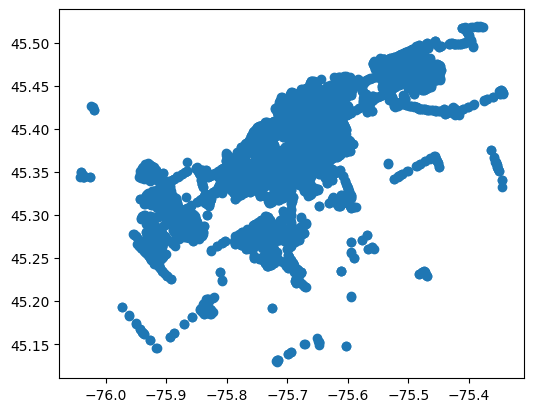

In [30]:
gdf.plot(figsize=(6,6))

<Axes: title={'center': 'Stop Location'}>

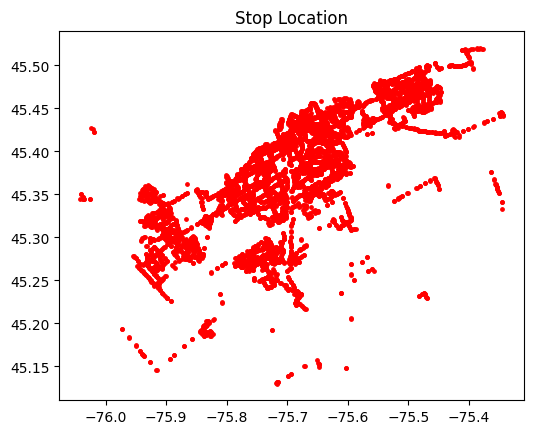

In [32]:
f,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_title('Stop Location')
gdf.plot(ax=ax, markersize=6, color='red')